In [1]:
from qiskit import *
from numpy import pi
from qiskit.visualization import *
import math


In [125]:
n = 4
qreg_q = QuantumRegister(n-1, 'original')
qreg_q_copy = QuantumRegister(n+1, 'copy')
qreg_q_copy_shifted = QuantumRegister(n+1, 'shifted copy')
original_c = ClassicalRegister(n-1, 'c1')
copy_c = ClassicalRegister(n, 'c2')
addition_c = ClassicalRegister(n+1, 'c3')
circuit = QuantumCircuit(qreg_q, qreg_q_copy, qreg_q_copy_shifted, original_c, copy_c, addition_c)

# Initialize the qubits
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier()
# Copy the string
circuit.cx(qreg_q[0], qreg_q_copy[0])
circuit.cx(qreg_q[1], qreg_q_copy[1])
circuit.cx(qreg_q[2], qreg_q_copy[2])
circuit.barrier()
# Shift the copy and add 1 on the last qubit
circuit.x(qreg_q_copy_shifted[0])
circuit.cx(qreg_q[0], qreg_q_copy_shifted[1])
circuit.cx(qreg_q[1], qreg_q_copy_shifted[2])
circuit.cx(qreg_q[2], qreg_q_copy_shifted[3])
circuit.barrier()

# Add the original and the shifted copy
circuit.h(qreg_q_copy[4])
circuit.cp(pi/2, qreg_q_copy[4], qreg_q_copy[3])
circuit.cp(pi/4, qreg_q_copy[4], qreg_q_copy[2])
circuit.cp(pi/8, qreg_q_copy[4], qreg_q_copy[1])
circuit.cp(pi/16, qreg_q_copy[4], qreg_q_copy[0])
circuit.cp(pi, qreg_q_copy[4], qreg_q_copy_shifted[4])
circuit.cp(pi/2, qreg_q_copy[4], qreg_q_copy_shifted[3])
circuit.cp(pi/4, qreg_q_copy[4], qreg_q_copy_shifted[2])
circuit.cp(pi/8, qreg_q_copy[4], qreg_q_copy_shifted[1])
circuit.cp(pi/16, qreg_q_copy[4], qreg_q_copy_shifted[0])
circuit.h(qreg_q_copy[3])
circuit.cp(pi/2, qreg_q_copy[3], qreg_q_copy[2])
circuit.cp(pi/4, qreg_q_copy[3], qreg_q_copy[1])
circuit.cp(pi/8, qreg_q_copy[3], qreg_q_copy[0])
circuit.cp(pi, qreg_q_copy[3], qreg_q_copy_shifted[3])
circuit.cp(pi/2, qreg_q_copy[3], qreg_q_copy_shifted[2])
circuit.cp(pi/4, qreg_q_copy[3], qreg_q_copy_shifted[1])
circuit.cp(pi/8, qreg_q_copy[3], qreg_q_copy_shifted[0])
circuit.h(qreg_q_copy[2])
circuit.cp(pi/2, qreg_q_copy[2], qreg_q_copy[1])
circuit.cp(pi/4, qreg_q_copy[2], qreg_q_copy[0])
circuit.cp(pi, qreg_q_copy[2], qreg_q_copy_shifted[2])
circuit.cp(pi/2, qreg_q_copy[2], qreg_q_copy_shifted[1])
circuit.cp(pi/4, qreg_q_copy[2], qreg_q_copy_shifted[0])
circuit.h(qreg_q_copy[1])
circuit.cp(pi/2, qreg_q_copy[1], qreg_q_copy[0])
circuit.cp(pi, qreg_q_copy[1], qreg_q_copy_shifted[1])
circuit.cp(pi/2, qreg_q_copy[1], qreg_q_copy_shifted[0])
circuit.h(qreg_q_copy[0])
circuit.cp(pi, qreg_q_copy[0], qreg_q_copy_shifted[0])

# Inverse QFT
circuit.h(qreg_q_copy[0])
circuit.cp(-pi/2, qreg_q_copy[0], qreg_q_copy[1])
circuit.cp(-pi/4, qreg_q_copy[0], qreg_q_copy[2])
circuit.cp(-pi/8, qreg_q_copy[0], qreg_q_copy[3])
circuit.cp(-pi/16, qreg_q_copy[0], qreg_q_copy[4])
circuit.h(qreg_q_copy[1])
circuit.cp(-pi/2, qreg_q_copy[1], qreg_q_copy[2])
circuit.cp(-pi/4, qreg_q_copy[1], qreg_q_copy[3])
circuit.cp(-pi/8, qreg_q_copy[1], qreg_q_copy[4])
circuit.h(qreg_q_copy[2])
circuit.cp(-pi/2, qreg_q_copy[2], qreg_q_copy[3])
circuit.cp(-pi/4, qreg_q_copy[2], qreg_q_copy[4])
circuit.h(qreg_q_copy[3])
circuit.cp(-pi/2, qreg_q_copy[3], qreg_q_copy[4])
circuit.h(qreg_q_copy[4])

/Users/choi/opt/anaconda3/envs/qiskit2/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


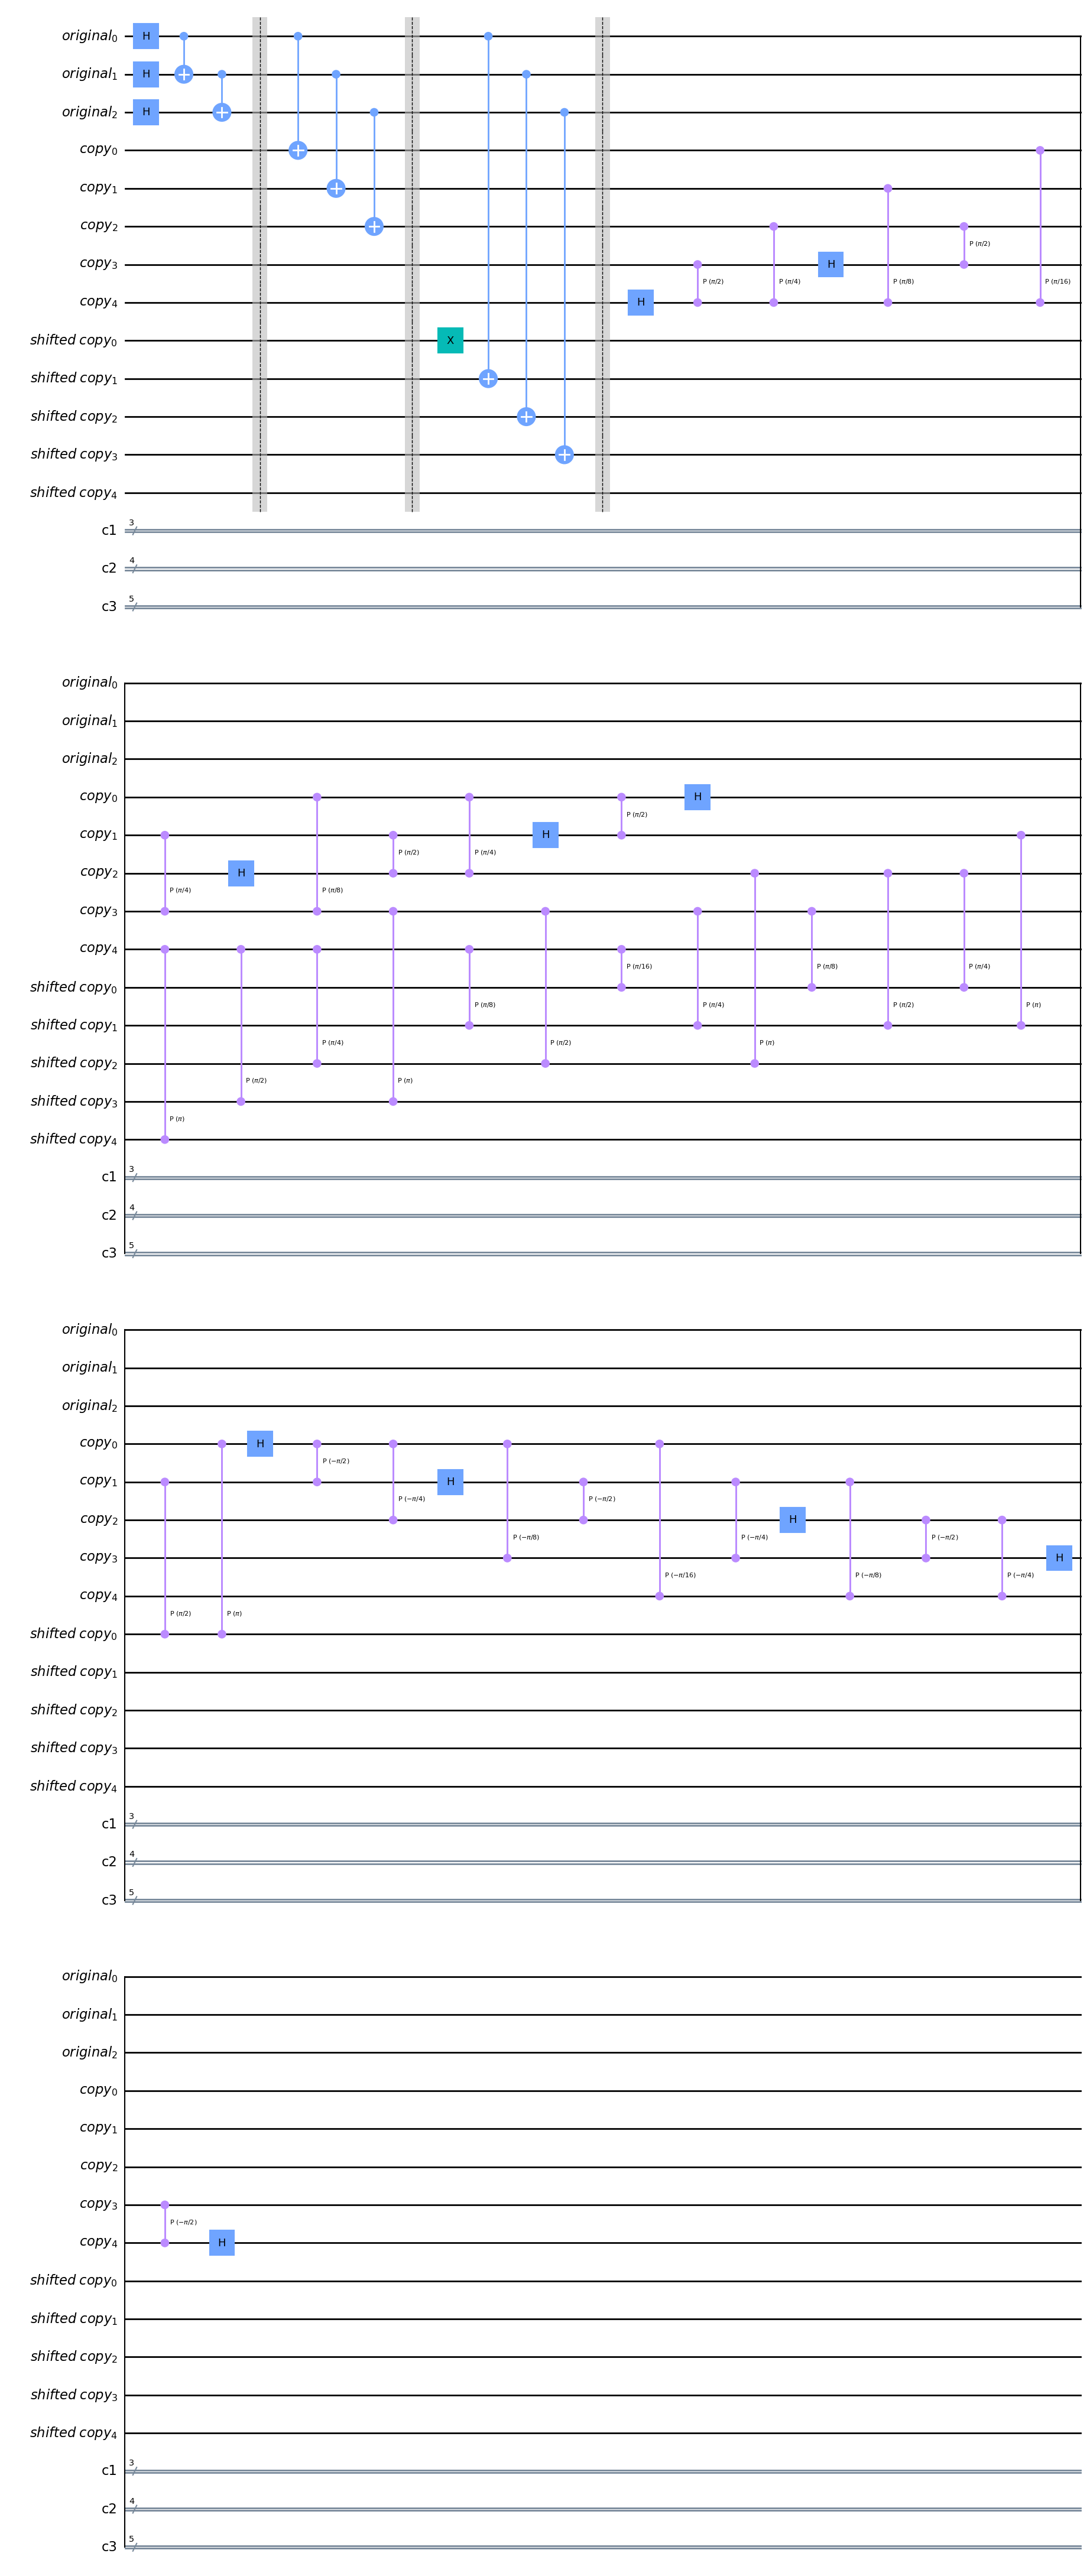

In [126]:
circuit.draw('mpl')

In [131]:
circuit.measure(qreg_q, original_c)
circuit.measure(qreg_q_copy_shifted[0:n], copy_c)
circuit.measure(qreg_q_copy, addition_c)

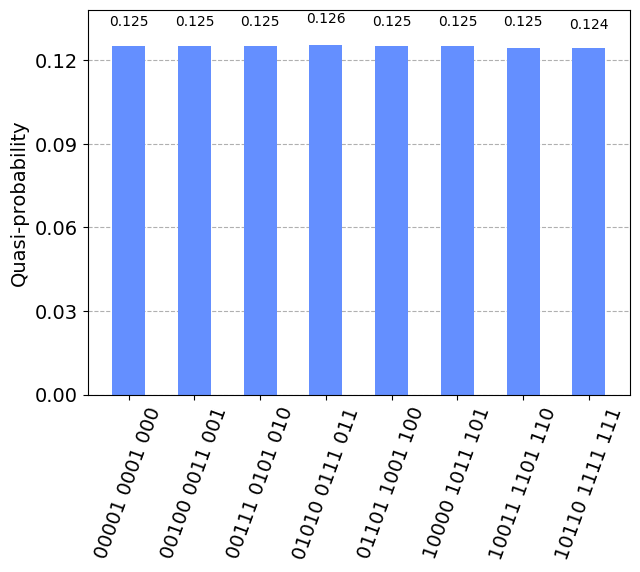

In [132]:
# run on simulator for count histogram
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1000000).result()
counts = result.get_counts() 

# calculate the probability of each state
prob = {}
for state in counts:
    prob[state] = counts[state] / 1000000

# plot the histogram
plot_histogram(prob)